In [1]:
import pandas as pd
import geopandas as gpd

C:\Users\mikko\AppData\Local\Temp\ipykernel_14076\1259499560.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
fp_2019 = "2019_monthly.csv"
fp_2020 ="2020_monthly.csv"
fp_2021 = "2021_monthly.csv"
fp_2022 = "2022_monthly.csv"
fp_2023 = "2023_monthly.csv"

data_2019 = pd.read_csv(fp_2019,sep=",")
data_2020 = pd.read_csv(fp_2020,sep=",")
data_2021 = pd.read_csv(fp_2021,sep=",")
data_2022 = pd.read_csv(fp_2022,sep=",")
data_2023 = pd.read_csv(fp_2023,sep=",")




In [3]:
geo_2020 = gpd.read_file("geom_2020.gpkg")

In [4]:
geo_data = gpd.read_file("geom_alueet.gpkg",crs = 'EPSG:3067')



In [5]:
geo_2020 = geo_2020.to_crs("EPSG:3067") 

In [6]:
geo_2020.crs == geo_data.crs

True

In [7]:
geo_data.rename(columns={'edgeUID': 'edge_uid'}, inplace=True)
geo_2020.rename(columns={'edgeUID': 'edge_uid'}, inplace=True)

In [8]:
all = pd.concat([data_2023, data_2022, data_2021], ignore_index=True)

In [9]:
data20202021 = pd.concat([data_2020, data_2019], ignore_index=True)

In [10]:
data_merged = pd.merge(all, geo_data, on='edge_uid', how='left')
year2020_merged = pd.merge(data20202021, geo_2020, on='edge_uid', how='left')


In [11]:
year2020_merged_parks = year2020_merged.loc[
    (year2020_merged['national_park'] == 'Yllas') | 
    (year2020_merged['national_park'] == 'Pyha') | 
    (year2020_merged['national_park'] == 'UK')
]


In [12]:
data_merged= pd.concat([data_merged,year2020_merged_parks], ignore_index=True)

In [13]:
data_merged['month'] = pd.to_datetime(data_merged['month'])

data_merged['year'] = data_merged['month'].dt.year

data_merged.head()

,edge_uid,activity_type,month,total_trip_count,forward_trip_count,reverse_trip_count,forward_people_count,reverse_people_count,forward_commute_trip_count,reverse_commute_trip_count,...,reverse_65_plus_people_count,forward_average_speed_meters_per_second,reverse_average_speed_meters_per_second,osm_reference_id,ride_count,ebike_ride_count,osmId,national_park,geometry,year
0,225221751,"Ride,EBikeRide",2023-07-01,10,5,5,5,5,0,0,...,0,6.59,5.21,389893342,10,0,NaN,NaN,None,2023
1,225221751,"Ride,EBikeRide",2023-08-01,5,0,5,0,5,0,0,...,0,0.00,3.23,389893342,5,0,NaN,NaN,None,2023
2,225243852,"Ride,EBikeRide",2023-08-01,15,10,10,5,5,0,0,...,0,4.01,3.92,758163275,5,10,NaN,NaN,None,2023
3,225243852,"Ride,EBikeRide",2023-03-01,20,15,0,5,0,0,0,...,0,3.31,0.00,758163275,15,0,NaN,NaN,None,2023
4,225243852,"Ride,EBikeRide",2023-01-01,10,5,5,5,5,0,0,...,0,4.05,6.19,758163275,5,0,NaN,NaN,None,2023


In [14]:
testi23 = data_merged.loc[data_merged['year'] == 2020]

In [15]:
print(testi23['total_trip_count'].sum())
#5885535'

538605


In [29]:
yllas_df = data_merged.loc[data_merged['national_park']=='Yllas']

UK_df = data_merged.loc[data_merged['national_park']=='UK']

pyha_df = data_merged.loc[data_merged['national_park']=='Pyha']

all_df = data_merged.loc[data_merged['national_park'].isin(['Yllas', 'Pyha', 'UK'])]


len(yllas_df)

25386

In [30]:
# Group by the desired column (e.g., 'year') and sum the required fields
yllas_grouped = yllas_df.groupby('year').agg({
    'ride_count': 'sum',
    'ebike_ride_count': 'sum',
    'forward_18_34_people_count': 'sum',
    'forward_35_54_people_count': 'sum',
    'forward_55_64_people_count': 'sum',
    'forward_65_plus_people_count': 'sum',
    'forward_male_people_count': 'sum',
    'forward_female_people_count': 'sum'
}).reset_index()

# Renaming columns to match the format you need
yllas_grouped.rename(columns={
    'ride_count': 'ride',
    'ebike_ride_count': 'eride',
    'forward_18_34_people_count': '18_34',
    'forward_35_54_people_count': '35_54',
    'forward_55_64_people_count': '55_64',
    'forward_65_plus_people_count': '65plus',
    'forward_male_people_count': 'male',
    'forward_female_people_count': 'female'
}, inplace=True)


# Group by the desired column (e.g., 'year') and sum the required fields
UK_grouped = UK_df.groupby('year').agg({
    'ride_count': 'sum',
    'ebike_ride_count': 'sum',
    'forward_18_34_people_count': 'sum',
    'forward_35_54_people_count': 'sum',
    'forward_55_64_people_count': 'sum',
    'forward_65_plus_people_count': 'sum',
    'forward_male_people_count': 'sum',
    'forward_female_people_count': 'sum'
}).reset_index()

# Renaming columns to match the format you need
UK_grouped.rename(columns={
    'ride_count': 'ride',
    'ebike_ride_count': 'eride',
    'forward_18_34_people_count': '18_34',
    'forward_35_54_people_count': '35_54',
    'forward_55_64_people_count': '55_64',
    'forward_65_plus_people_count': '65plus',
    'forward_male_people_count': 'male',
    'forward_female_people_count': 'female'
}, inplace=True)


# Group by the desired column (e.g., 'year') and sum the required fields
pyha_grouped = pyha_df.groupby('year').agg({
    'ride_count': 'sum',
    'ebike_ride_count': 'sum',
    'forward_18_34_people_count': 'sum',
    'forward_35_54_people_count': 'sum',
    'forward_55_64_people_count': 'sum',
    'forward_65_plus_people_count': 'sum',
    'forward_male_people_count': 'sum',
    'forward_female_people_count': 'sum'
}).reset_index()

# Renaming columns to match the format you need
pyha_grouped.rename(columns={
    'ride_count': 'ride',
    'ebike_ride_count': 'eride',
    'forward_18_34_people_count': '18_34',
    'forward_35_54_people_count': '35_54',
    'forward_55_64_people_count': '55_64',
    'forward_65_plus_people_count': '65plus',
    'forward_male_people_count': 'male',
    'forward_female_people_count': 'female'
}, inplace=True)


# Group by the desired column (e.g., 'year') and sum the required fields
all_grouped = all_df.groupby('year').agg({
    'ride_count': 'sum',
    'ebike_ride_count': 'sum',
    'forward_18_34_people_count': 'sum',
    'forward_35_54_people_count': 'sum',
    'forward_55_64_people_count': 'sum',
    'forward_65_plus_people_count': 'sum',
    'forward_male_people_count': 'sum',
    'forward_female_people_count': 'sum'
}).reset_index()

# Renaming columns to match the format you need
all_grouped.rename(columns={
    'ride_count': 'ride',
    'ebike_ride_count': 'eride',
    'forward_18_34_people_count': '18_34',
    'forward_35_54_people_count': '35_54',
    'forward_55_64_people_count': '55_64',
    'forward_65_plus_people_count': '65plus',
    'forward_male_people_count': 'male',
    'forward_female_people_count': 'female'
}, inplace=True)

In [80]:
grouped_df.head()

,year,ride,eride,18_34,35_54,55_64,65plus,male,female
0,2019,138475,5170,13200,34195,1400,0,47830,8550
1,2020,296825,19760,32810,75665,3685,340,102660,19935
2,2021,375935,48080,38200,93585,5165,1415,119265,28700
3,2022,231670,48985,24150,67940,4785,425,85930,19690
4,2023,237680,66275,29235,70870,8370,1595,94765,22185


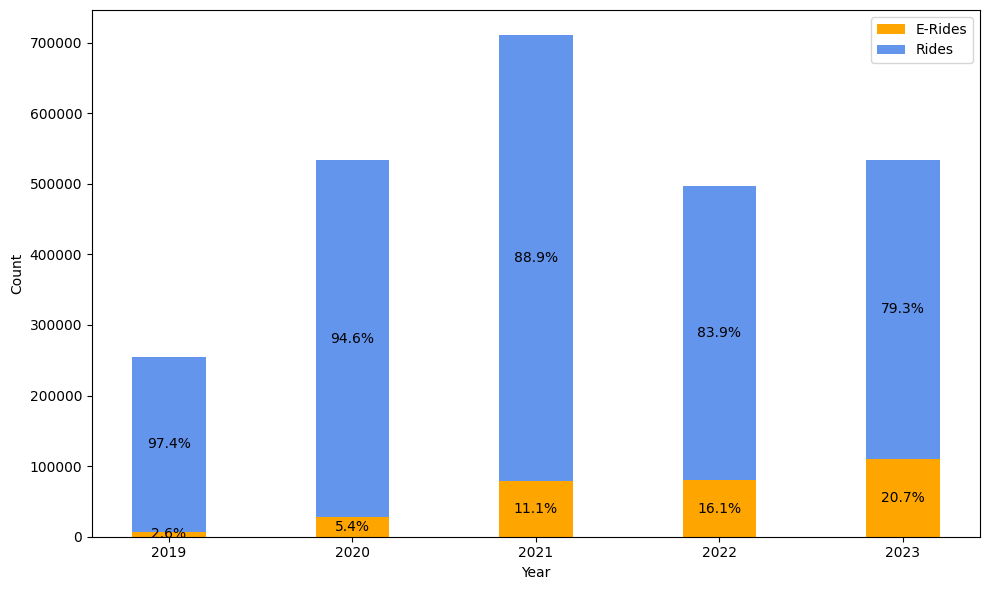

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Sample Data from your DataFrame
years = all_grouped['year']
ride = all_grouped['ride']
eride = all_grouped['eride']

# Define the positions for the bars
x = np.arange(len(years))  # the label locations

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the e-ride bars (on the bottom)
bars_eride = ax.bar(x, eride, width=0.4, color='orange', label='E-Rides')

# Plotting the ride bars on top of the e-ride bars
bars_ride = ax.bar(x, ride, width=0.4, bottom=eride, color='cornflowerblue', label='Rides')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Year')
ax.set_ylabel('Count')
#ax.set_title('Rides vs E-Rides by Year')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Function to add percentage labels to each bar
def add_percentage_labels(bars, bottom_values, total_values):
    for bar, bottom, total in zip(bars, bottom_values, total_values):
        height = bar.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, bottom + height / 2),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='center', color='black', fontsize=10)

# Total counts for percentage calculations
total_counts = np.array(ride) + np.array(eride)

# Add percentage labels for e-rides
add_percentage_labels(bars_eride, np.zeros(len(eride)), total_counts)

# Add percentage labels for rides
add_percentage_labels(bars_ride, eride, total_counts)

# Display the plot
plt.tight_layout()


plt.savefig('ride_eride_kaikki.png',dpi=300)

plt.show()

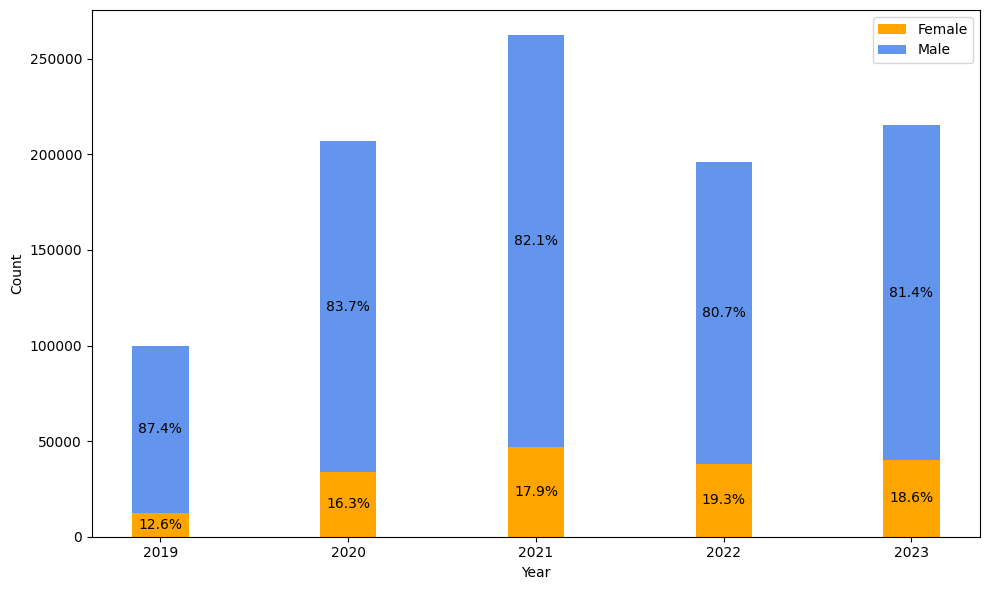

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your table
years = all_grouped['year']
male = all_grouped['male']
female = all_grouped['female']

# Define the positions for the bars
x = np.arange(len(years))  # the label locations

# Calculate total counts for percentage calculations
total_counts = np.array(male) + np.array(female)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the female bars (on the bottom)
bars_female = ax.bar(x, female, width=0.3, color='orange', label='Female')

# Plotting the male bars on top of the female bars
bars_male = ax.bar(x, male, width=0.3, bottom=female, color='cornflowerblue', label='Male')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Year')
ax.set_ylabel('Count')
#ax.set_title('Male vs Female Count by Year')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Function to add percentage labels to each bar
def add_percentage_labels(bars, bottom_values, total_values):
    for bar, bottom, total in zip(bars, bottom_values, total_values):
        height = bar.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, bottom + height / 2),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='center', color='black', fontsize=10)

# Add percentage labels for females
add_percentage_labels(bars_female, np.zeros(len(female)), total_counts)

# Add percentage labels for males
add_percentage_labels(bars_male, female, total_counts)

# Display the plot
plt.tight_layout()


plt.savefig('male_female_kaikki.png',dpi=300)

plt.show()


In [96]:
grouped_df.columns

Index(['year', 'ride', 'eride', '18_34', '35_54', '55_64', '65plus', 'male',
       'female'],
      dtype='object')

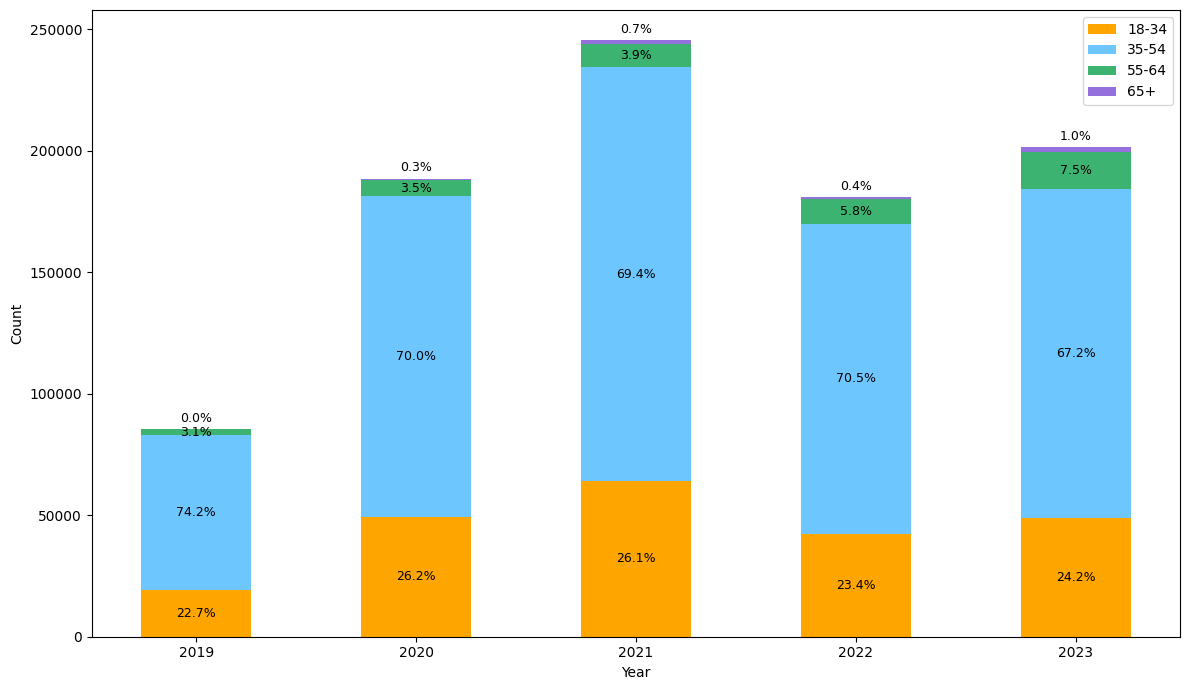

In [47]:
# Data from your table
years = all_grouped['year']
age_18_34 = all_grouped['18_34']
age_35_54 = all_grouped['35_54']
age_55_64 = all_grouped['55_64']
age_65plus = all_grouped['65plus']

# Define the positions for the bars
x = np.arange(len(years))  # the label locations

# Calculate total counts for percentage calculations
total_counts = np.array(age_18_34) + np.array(age_35_54) + np.array(age_55_64) + np.array(age_65plus)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plotting each age group in a stacked manner
bars_18_34 = ax.bar(x, age_18_34, width=0.5, color='orange', label='18-34')
bars_35_54 = ax.bar(x, age_35_54, width=0.5, bottom=age_18_34, color='#6EC6FF', label='35-54')
bars_55_64 = ax.bar(x, age_55_64, width=0.5, bottom=np.array(age_18_34) + np.array(age_35_54), color='#3CB371', label='55-64')
bars_65plus = ax.bar(x, age_65plus, width=0.5, bottom=np.array(age_18_34) + np.array(age_35_54) + np.array(age_55_64), color='#9370DB', label='65+')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Year')
ax.set_ylabel('Count')
#ax.set_title('Age Group Distribution by Year (Stacked)')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Function to add percentage labels to each bar
# Function to add percentage labels to each bar
def add_percentage_labels(bars, bottom_values, total_values, above=False):
    for bar, bottom, total in zip(bars, bottom_values, total_values):
        height = bar.get_height()
        percentage = (height / total) * 100
        if above:
            # Place the label above the bar
            ax.annotate(f'{percentage:.1f}%', 
                        xy=(bar.get_x() + bar.get_width() / 2, bottom + height),
                        xytext=(0, 3),  # Offset to place the label above
                        textcoords="offset points",
                        ha='center', va='bottom', color='black', fontsize=9)
        else:
            # Place the label inside the bar
            ax.annotate(f'{percentage:.1f}%', 
                        xy=(bar.get_x() + bar.get_width() / 2, bottom + height / 2),
                        xytext=(0, 0), 
                        textcoords="offset points",
                        ha='center', va='center', color='black', fontsize=9)
# Add percentage labels for each age group
add_percentage_labels(bars_18_34, np.zeros(len(age_18_34)), total_counts)
add_percentage_labels(bars_35_54, age_18_34, total_counts)
add_percentage_labels(bars_55_64, np.array(age_18_34) + np.array(age_35_54), total_counts)
add_percentage_labels(bars_65plus, np.array(age_18_34) + np.array(age_35_54) + np.array(age_55_64), total_counts, above=True)

# Display the plot
plt.tight_layout()


plt.savefig('ages_kaikki.png',dpi=300)

plt.show()